- **Final Team Project:** Music Genre and Composer Classification Using Deep Learning
- **Team Members:** Manoj Nair, Samiksha Kodgire


# Deep Learning for Classical Composer Identification

## Introduction

Music is a powerful art form with distinct stylistic fingerprints left by its creators. This project aims to demystify those fingerprints by building a deep learning system capable of identifying the composer of a piece of classical music from its musical score. For a listener or a novice musician, distinguishing between the intricate counterpoint of Bach and the dramatic flair of Beethoven can be challenging. We will leverage the power of artificial intelligence to automate this task.

The core objective is to train and evaluate two prominent deep learning architectures, **Long Short-Term Memory (LSTM)** and **Convolutional Neural Network (CNN)**, for this classification task. We will focus on four titans of classical music: **Bach, Beethoven, Chopin, and Mozart**. By processing their compositions in MIDI format, we will train our models to recognize the unique patterns, motifs, and structures inherent to each composer's style.

-----

## 1\. Dataset Preparation and Setup

We prepared the dataset before running the code by following the below steps

### How to Prepare the Dataset

1.  **Download**: First, download the dataset from the [Kaggle website](https://www.kaggle.com/datasets/soumikrakshit/classical-music-midi).

2.  **Unzip**: Unzip the downloaded file. You will find folders named after various composers.

3.  **Create a Root Folder**: In your Google Drive (or locally), create a main folder for this project, for example, `classical_music_project`.

4.  **Organize Composer Folders**: Inside `classical_music_project`, create a new folder named `midi_scores`. Now, from the unzipped Kaggle data, copy only the folders for the composers we need into this `midi_scores` folder. Final directory structure will look like this:

    ```
    classical_music_project/
    └── midi_scores/
        ├── bach/
        │   ├── file1.mid
        │   ├── file2.mid
        │   └── ...
        ├── beethoven/
        │   ├── file1.mid
        │   └── ...
        ├── chopin/
        │   ├── file1.mid
        │   └── ...
        └── mozart/
            ├── file1.mid
            └── ...
    ```

5.  **Upload to Google Colab**: Upload the entire `classical_music_project` folder to your Google Drive. Then, mounted the Drive in Google Colab to access the files.

6. Finally run the below script to create the final data frame by balancing the numbers of the files for each composer.


In [ ]:
import os
import glob
import random
import shutil # Library for file operations like copying
import pandas as pd

from google.colab import drive

# Mount Google Drive
print("Connecting to Google Drive...")
drive.mount('/content/drive')
print("Google Drive connected!")

# --- 1. Define Source and Destination Paths ---
# Source path of your original, messy dataset
source_base_path = '/content/drive/My Drive/MS-AAI/AAI-511/FinalProject/dataset/'

# Destination path for your new, clean, and balanced dataset
output_base_path = '/content/drive/My Drive/MS-AAI/AAI-511/FinalProject/classical_music_project/midi_scores/'

# We use the capitalized names here to match your original source folders
composers = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

# --- 2. Collect All File Paths Recursively using os.walk (More Robust) ---
all_source_files = {composer: [] for composer in composers}
print("\nScanning all folders and subfolders for MIDI files using os.walk()...")

for composer in composers:
    composer_path = os.path.join(source_base_path, composer)

    # os.walk() reliably traverses the entire directory tree from the top down.
    for dirpath, dirnames, filenames in os.walk(composer_path):
        for filename in filenames:
            # Check if the file ends with .mid or .midi to be safe
            if filename.lower().endswith(('.mid', '.midi')):
                full_path = os.path.join(dirpath, filename)
                all_source_files[composer].append(full_path)

    print(f"Found {len(all_source_files[composer])} source files for {composer}.")

# --- 3. Determine the Balancing Number ---
try:
    min_count = min(len(files) for files in all_source_files.values())
    if min_count == 0:
        print("\nWarning: Found 0 files for at least one composer. Cannot proceed.")
    else:
        print(f"\nSmallest class size is {min_count}. Balancing dataset to this number.")
except (ValueError, IndexError):
    print("\nError: Could not find files for at least one composer. Please check your path and folder names.")
    min_count = 0

# --- 4. Create Clean Output Directories in Lowercase ---
if min_count > 0:
    print("\nCreating new clean output directories...")
    for composer in composers:
        lowercase_composer_folder = os.path.join(output_base_path, composer.lower())
        os.makedirs(lowercase_composer_folder, exist_ok=True)
    print("Lowercase output directories are ready.")

# --- 5. Balance, Copy, and Rename Files to the New Location ---
final_data = []
if min_count > 0:
    print("\nBalancing dataset and copying files to new location...")
    for composer, file_list in all_source_files.items():
        sampled_source_files = random.sample(file_list, min_count)

        for source_path in sampled_source_files:
            original_filename = os.path.basename(source_path)
            new_filename = original_filename.replace(' ', '_')
            destination_path = os.path.join(output_base_path, composer.lower(), new_filename)
            shutil.copy(source_path, destination_path)
            final_data.append({'composer': composer.lower(), 'filepath': destination_path})

    print("Dataset successfully created, balanced, and cleaned!")

# --- 6. Create a Final DataFrame ---
if final_data:
    prepared_df = pd.DataFrame(final_data)
    print("\n--- Final DataFrame Pointing to Cleaned Files ---")
    display(prepared_df)
    print("\n--- Final Composer Counts (to confirm balance and lowercase) ---")
    print(prepared_df['composer'].value_counts())
else:
    print("\nNo data was processed. Final DataFrame is empty.")

Connecting to Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive connected!

Scanning all folders and subfolders for MIDI files using os.walk()...
Found 1024 source files for Bach.
Found 213 source files for Beethoven.
Found 136 source files for Chopin.
Found 257 source files for Mozart.

Smallest class size is 136. Balancing dataset to this number.

Creating new clean output directories...
Lowercase output directories are ready.

Balancing dataset and copying files to new location...
Dataset successfully created, balanced, and cleaned!

--- Final DataFrame Pointing to Cleaned Files ---


,composer,filepath
0,bach,/content/drive/My Drive/MS-AAI/AAI-511/FinalPr...
1,bach,/content/drive/My Drive/MS-AAI/AAI-511/FinalPr...
2,bach,/content/drive/My Drive/MS-AAI/AAI-511/FinalPr...
3,bach,/content/drive/My Drive/MS-AAI/AAI-511/FinalPr...
4,bach,/content/drive/My Drive/MS-AAI/AAI-511/FinalPr...
...,...,...
539,mozart,/content/drive/My Drive/MS-AAI/AAI-511/FinalPr...
540,mozart,/content/drive/My Drive/MS-AAI/AAI-511/FinalPr...
541,mozart,/content/drive/My Drive/MS-AAI/AAI-511/FinalPr...
542,mozart,/content/drive/My Drive/MS-AAI/AAI-511/FinalPr...



--- Final Composer Counts (to confirm balance and lowercase) ---
composer
bach         136
beethoven    136
chopin       136
mozart       136
Name: count, dtype: int64



### **1.1.Install Libraries**

Install the necessary `music21` library for MIDI file processing.

In [1]:
# Install the music21 library for music processing
# It is essential for parsing MIDI files and extracting musical information
print("\nInstalling music21 library...")
!pip install music21
print("music21 installed successfully.")


Installing music21 library...
music21 installed successfully.


### **1.2. Import Libraries**

Here, we import all the Python libraries required for the project.

In [3]:
# Core libraries for data manipulation and numerical operations
import numpy as np
import pandas as pd
import os

# Music processing
from music21 import converter, instrument, note, chord, stream

# File and directory handling
import glob
from tqdm.notebook import tqdm

# Deep Learning with TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# Data preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for plots
plt.style.use('ggplot')
print("All libraries imported.")

All libraries imported.


-----

## **2\. Data Pre-processing and Feature Extraction**

In this step, we'll read the MIDI files, extract the musical information (notes and chords), and convert them into a numerical format that our models can understand.

Our strategy is:

1.  **Parse MIDI files**: Read each composer's MIDI files.
2.  **Extract Notes/Chords**: For each file, extract a sequence of all musical events. We represent notes by their pitch (e.g., 'C4') and chords by a string of their constituent notes (e.g., 'C4.E4.G4').
3.  **Label Data**: Associate each sequence with its composer.
4.  **Create Vocabulary**: Build a dictionary that maps every unique note/chord to an integer.
5.  **Prepare Sequences**: Convert our musical sequences into integer sequences and pad them to a uniform length. This ensures all inputs to the model have the same size.

<!-- end list -->

In [4]:
# --- All necessary imports, including the 'warnings' module ---
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import warnings # Import the warnings library
from music21 import converter, instrument, note, chord
from music21.midi.translate import TranslateWarning # Import the specific warning
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# --- 1. Define Paths and Labels ---
base_path = '/content/drive/My Drive/MS-AAI/AAI-511/FinalProject/classical_music_project/midi_scores/'
composers = ['bach', 'beethoven', 'chopin', 'mozart']
composer_map = {i: composer for i, composer in enumerate(composers)}
label_map = {composer: i for i, composer in enumerate(composers)}

# --- 2. Collect All File Paths Recursively using os.walk (More Robust) ---
all_files_to_process = []
labels_for_all_files = []

print("Scanning all folders and subfolders for MIDI files...")
for composer in composers:
    composer_path = os.path.join(base_path, composer)
    if not os.path.isdir(composer_path):
        print(f"Warning: Directory not found for {composer} at {composer_path}")
        continue

    for dirpath, _, filenames in os.walk(composer_path):
        for f in filenames:
            if f.lower().endswith(('.mid', '.midi')):
                full_path = os.path.join(dirpath, f)
                all_files_to_process.append(full_path)
                labels_for_all_files.append(label_map[composer])

print(f"Found a total of {len(all_files_to_process)} MIDI files to process.")

# --- 3. Parse MIDI files and Extract Notes (with warnings suppressed) ---
notes_data = []
labels_data = []

warnings.filterwarnings('ignore', category=TranslateWarning)

# Proceed only if files were found
if all_files_to_process:
    for i in tqdm(range(len(all_files_to_process)), desc="Processing MIDI files"):
        file = all_files_to_process[i]
        label = labels_for_all_files[i]

        try:
            midi = converter.parse(file)
            notes_to_parse = None
            parts = instrument.partitionByInstrument(midi)
            notes_to_parse = midi.flat.notes if not parts else parts.parts[0].recurse()

            current_notes = []
            for element in notes_to_parse:
                if isinstance(element, note.Note):
                    current_notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    current_notes.append('.'.join(str(n) for n in element.normalOrder))

            if current_notes:
                notes_data.append(current_notes)
                labels_data.append(label)

        except Exception as e:
            # We still print real errors, just not warnings
            print(f"\nCould not process file {file}: {e}")
else:
    print("\nCRITICAL: No MIDI files found. Please check your `base_path` and folder structure.")

# --- 4. Verify, Pad, and Prepare Data for the Model ---
if not notes_data:
    print("CRITICAL: No musical data could be extracted. Halting script.")
else:
    print(f"\nSuccessfully processed {len(notes_data)} MIDI files with musical data.")

    # Create Vocabulary
    all_notes = [nt for notes in notes_data for nt in notes]
    pitch_names = sorted(set(item for item in all_notes))
    n_vocab = len(pitch_names)
    note_to_int = dict((note, number) for number, note in enumerate(pitch_names))
    print(f"Total unique notes/chords (vocabulary size): {n_vocab}")

    # Pad Sequences
    SEQUENCE_LENGTH = 200
    X = []
    y = []
    print(f"Creating sequences of length {SEQUENCE_LENGTH}...")
    for i, notes in enumerate(notes_data):
        int_sequence = [note_to_int.get(note, 0) for note in notes] # Use .get for safety
        padded_sequence = np.zeros(SEQUENCE_LENGTH) # Initialize with zeros

        if len(int_sequence) > SEQUENCE_LENGTH:
            padded_sequence = np.array(int_sequence[:SEQUENCE_LENGTH])
        else:
            padded_sequence[-len(int_sequence):] = np.array(int_sequence) # Pad at the end

        X.append(padded_sequence)
        y.append(labels_data[i])

    X = np.array(X)
    y = np.array(y)
    y = to_categorical(y, num_classes=len(composers))

    # Split Data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("\nData preparation complete.")
    print(f"Shape of training features (X_train): {X_train.shape}")
    print(f"Shape of training labels (y_train): {y_train.shape}")
    print(f"Shape of validation features (X_val): {X_val.shape}")
    print(f"Shape of validation labels (y_val): {y_val.shape}")

Scanning all folders and subfolders for MIDI files...
Found a total of 544 MIDI files to process.


Processing MIDI files:   0%|          | 0/544 [00:00<?, ?it/s]


Successfully processed 362 MIDI files with musical data.
Total unique notes/chords (vocabulary size): 923
Creating sequences of length 200...

Data preparation complete.
Shape of training features (X_train): (289, 200)
Shape of training labels (y_train): (289, 4)
Shape of validation features (X_val): (73, 200)
Shape of validation labels (y_val): (73, 4)


-----

## **3\. Model Building**

Now we will define our two deep learning models.

1.  **LSTM Model**: Ideal for sequential data like music. It can remember patterns over long sequences.
2.  **CNN Model**: Effective at finding local patterns or "motifs" within the musical sequence.

### **3.1. LSTM Model Architecture**

The LSTM model will use an `Embedding` layer to learn a dense representation for each note, followed by an LSTM layer to process the sequence, and finally `Dense` layers for classification.

In [11]:
from tensorflow.keras.layers import Bidirectional

def build_lstm_model(input_shape, num_classes, vocab_size):
    """Builds and compiles a Bidirectional LSTM model."""
    model = Sequential([
        # Embedding layer
        Embedding(input_dim=vocab_size, output_dim=128, input_length=input_shape[0]),

        # MODIFIED: Bidirectional LSTM layer captures patterns from both directions
        Bidirectional(LSTM(128, return_sequences=False)),
        Dropout(0.3),

        # Dense layers for classification
        Dense(128, activation='relu'),
        Dropout(0.3),

        # Output layer
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the modified LSTM model
lstm_model = build_lstm_model((SEQUENCE_LENGTH,), len(composers), n_vocab)
print("--- Modified Bidirectional LSTM Model Summary ---")
lstm_model.summary()

--- Modified Bidirectional LSTM Model Summary ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### **3.2. CNN Model Architecture**

The CNN model will also use an `Embedding` layer, followed by `Conv1D` layers to act as feature detectors for musical motifs, and `Dense` layers for the final classification.

In [12]:
def build_cnn_model(input_shape, num_classes, vocab_size):
    """Builds and compiles a deeper CNN model."""
    model = Sequential([
        # Embedding layer
        Embedding(input_dim=vocab_size, output_dim=128, input_length=input_shape[0]),

        # Convolutional Block 1
        Conv1D(128, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        # Convolutional Block 2
        Conv1D(256, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        # Added a third convolutional block
        Conv1D(256, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        # Flatten the output
        Flatten(),

        # Dense layers for classification
        Dense(256, activation='relu'),
        Dropout(0.4),

        # Output layer
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the modified CNN model
cnn_model = build_cnn_model((SEQUENCE_LENGTH,), len(composers), n_vocab)
print("\n--- Modified Deeper CNN Model Summary ---")
cnn_model.summary()


--- Modified Deeper CNN Model Summary ---


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

-----

## **4\. Model Training**

We will now train both models on our prepared dataset. We use a `ModelCheckpoint` to save the best version of each model during training (the one with the highest validation accuracy).

### **4.1. Train the LSTM Model**

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --- 1. Define the Advanced Callbacks ---

# EarlyStopping to prevent overfitting and stop training when validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10, # Number of epochs with no improvement after which training will be stopped.
    verbose=1,
    restore_best_weights=True # Restores model weights from the epoch with the best value of the monitored metric.
)

# ReduceLROnPlateau to reduce the learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=5, # Number of epochs with no improvement after which learning rate will be reduced.
    verbose=1,
    min_lr=0.00001 # Lower bound on the learning rate.
)


# --- 2. Train the LSTM Model with the New Callbacks ---
print("--- Training LSTM Model with Advanced Callbacks---")

lstm_checkpoint = ModelCheckpoint(
    'best_lstm_model_v2.h5',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

# Combine all callbacks into a list
lstm_callbacks = [lstm_checkpoint, early_stopping, reduce_lr]

# Train the model with a higher epoch count, letting EarlyStopping find the best time to stop
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=100,  # Set a high number, EarlyStopping will handle the rest
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=lstm_callbacks # Use the new list of callbacks
)


--- Training LSTM Model with Advanced Callbacks---
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2740 - loss: 1.3836
Epoch 1: val_accuracy improved from -inf to 0.38356, saving model to best_lstm_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.2785 - loss: 1.3833 - val_accuracy: 0.3836 - val_loss: 1.3711 - learning_rate: 0.0010
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4144 - loss: 1.3619
Epoch 2: val_accuracy did not improve from 0.38356
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4105 - loss: 1.3609 - val_accuracy: 0.3562 - val_loss: 1.3335 - learning_rate: 0.0010
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3528 - loss: 1.3057
Epoch 3: val_accuracy did not improve from 0.38356
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3534 - loss: 1.3044 - val_accuracy: 0.3836 - val_loss: 1.2362 - learning_rate: 0.0010
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4734 - loss: 1.1999
Epoch 4: val_accuracy improved from 0.38356 to 0.50685, saving model to best_lstm_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4723 - loss: 1.2002 - val_accuracy: 0.5068 - val_loss: 1.1382 - learning_rate: 0.0010
Epoch 5/100
3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5946 - loss: 1.0667
Epoch 5: val_accuracy improved from 0.50685 to 0.52055, saving model to best_lstm_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5805 - loss: 1.0804 - val_accuracy: 0.5205 - val_loss: 1.0554 - learning_rate: 0.0010
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6008 - loss: 1.0213
Epoch 6: val_accuracy improved from 0.52055 to 0.58904, saving model to best_lstm_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5999 - loss: 1.0142 - val_accuracy: 0.5890 - val_loss: 0.9896 - learning_rate: 0.0010
Epoch 7/100
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6641 - loss: 0.8541 
Epoch 7: val_accuracy improved from 0.58904 to 0.60274, saving model to best_lstm_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6503 - loss: 0.8762 - val_accuracy: 0.6027 - val_loss: 1.0144 - learning_rate: 0.0010
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6195 - loss: 0.9541
Epoch 8: val_accuracy did not improve from 0.60274
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6224 - loss: 0.9470 - val_accuracy: 0.5068 - val_loss: 1.0532 - learning_rate: 0.0010
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6559 - loss: 0.9093
Epoch 9: val_accuracy did not improve from 0.60274
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6619 - loss: 0.9002 - val_accuracy: 0.5616 - val_loss: 0.9757 - learning_rate: 0.0010
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7365 - loss: 0.7221
Epoch 10: val_accuracy did not improve from 0.60274
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7331 - loss: 0.7208 - val_accuracy: 0.5205 - val_loss: 1.0251 - learning_rate: 0.0010
Epoch 11/100
3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8095 - loss: 0.5044 - val_accuracy: 0.6301 - val_loss: 1.0951 - learning_rate: 0.0010
Epoch 14/100
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8193 - loss: 0.4958
Epoch 14: val_accuracy did not improve from 0.63014

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8150 - loss: 0.4957 - val_accuracy: 0.5890 - val_loss: 1.0104 - learning_rate: 0.0010
Epoch 15/100
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8633 - loss: 0.4164 
Epoch 15: val_accuracy did not improve from 0.63014
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8604 - loss: 0.4140 - val_accuracy: 0.6164 - val_loss: 1.0238 - learning_rate: 2.0000e-04
Epoch 16/100
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8584 - loss: 0.3816 
Epoch 16: val_accuracy did not improve from 0.63014
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8595 - loss: 0.3830 - val_accuracy: 0.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8822 - loss: 0.3469 - val_accuracy: 0.6438 - val_loss: 1.0695 - learning_rate: 2.0000e-04
Epoch 19/100
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9007 - loss: 0.2837
Epoch 19: val_accuracy did not improve from 0.64384

Epoch 19: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8923 - loss: 0.2986 - val_accuracy: 0.6438 - val_loss: 1.0837 - learning_rate: 2.0000e-04
Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 9.


### **4.2. Train the CNN Model**

In [14]:
print("\n--- Training CNN Model with Advanced Callbacks ---")

cnn_checkpoint = ModelCheckpoint(
    'best_cnn_model_v2.h5',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

# Combine all callbacks into a list
cnn_callbacks = [cnn_checkpoint, early_stopping, reduce_lr]

# Train the model
cnn_history = cnn_model.fit(
    X_train, y_train,
    epochs=100,  # Set a high number, EarlyStopping will handle the rest
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=cnn_callbacks # Use the new list of callbacks
)


--- Training CNN Model with Advanced Callbacks ---
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2734 - loss: 1.3949 
Epoch 1: val_accuracy improved from -inf to 0.26027, saving model to best_cnn_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.2700 - loss: 1.3952 - val_accuracy: 0.2603 - val_loss: 1.3787 - learning_rate: 0.0010
Epoch 2/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3438 - loss: 1.3587
Epoch 2: val_accuracy improved from 0.26027 to 0.30137, saving model to best_cnn_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3131 - loss: 1.3664 - val_accuracy: 0.3014 - val_loss: 1.3576 - learning_rate: 0.0010
Epoch 3/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.3594 - loss: 1.3189
Epoch 3: val_accuracy improved from 0.30137 to 0.38356, saving model to best_cnn_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3195 - loss: 1.3257 - val_accuracy: 0.3836 - val_loss: 1.2745 - learning_rate: 0.0010
Epoch 4/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4375 - loss: 1.2606
Epoch 4: val_accuracy improved from 0.38356 to 0.49315, saving model to best_cnn_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4400 - loss: 1.2403 - val_accuracy: 0.4932 - val_loss: 1.1646 - learning_rate: 0.0010
Epoch 5/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4062 - loss: 1.1748
Epoch 5: val_accuracy improved from 0.49315 to 0.50685, saving model to best_cnn_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4324 - loss: 1.1407 - val_accuracy: 0.5068 - val_loss: 1.1071 - learning_rate: 0.0010
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5360 - loss: 1.0754
Epoch 6: val_accuracy improved from 0.50685 to 0.56164, saving model to best_cnn_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5355 - loss: 1.0734 - val_accuracy: 0.5616 - val_loss: 1.1052 - learning_rate: 0.0010
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5874 - loss: 0.9759 
Epoch 7: val_accuracy improved from 0.56164 to 0.61644, saving model to best_cnn_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5863 - loss: 0.9773 - val_accuracy: 0.6164 - val_loss: 0.9511 - learning_rate: 0.0010
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6287 - loss: 0.8732
Epoch 8: val_accuracy did not improve from 0.61644
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6265 - loss: 0.8714 - val_accuracy: 0.5753 - val_loss: 1.0322 - learning_rate: 0.0010
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6437 - loss: 0.8598 
Epoch 9: val_accuracy improved from 0.61644 to 0.64384, saving model to best_cnn_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6443 - loss: 0.8578 - val_accuracy: 0.6438 - val_loss: 0.8749 - learning_rate: 0.0010
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7082 - loss: 0.6960
Epoch 10: val_accuracy did not improve from 0.64384
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7090 - loss: 0.6947 - val_accuracy: 0.6438 - val_loss: 0.7916 - learning_rate: 0.0010
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7967 - loss: 0.5750
Epoch 11: val_accuracy improved from 0.64384 to 0.65753, saving model to best_cnn_model_v2.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7965 - loss: 0.5733 - val_accuracy: 0.6575 - val_loss: 0.7603 - learning_rate: 0.0010
Epoch 12/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7344 - loss: 0.4794
Epoch 12: val_accuracy did not improve from 0.65753
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8064 - loss: 0.4484 - val_accuracy: 0.6301 - val_loss: 1.0081 - learning_rate: 0.0010
Epoch 13/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7656 - loss: 0.5347
Epoch 13: val_accuracy did not improve from 0.65753
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8370 - loss: 0.3977 - val_accuracy: 0.6575 - val_loss: 1.0627 - learning_rate: 0.0010
Epoch 14/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.8750 - loss: 0.3402
Epoch 14: val_accuracy did not improve from 0.65753
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8564 - loss: 0.3419 - val_accuracy: 0.6438 - val_loss: 1.2339 - learning_rate: 0.0010
Epoch 15/100
1/5 ━━━━━━━━━━━━━━━━━━

-----

## **5\. Model Evaluation and Analysis**

After training, we must evaluate the performance of our models. We will:

1.  **Plot Training History**: Visualize the accuracy and loss curves to check for overfitting.
2.  **Generate Classification Report**: Calculate precision, recall, and F1-score for each composer.
3.  **Create Confusion Matrix**: See which composers are most often confused with each other.

### **5.1. Plot Training History**

--- LSTM Model Training History ---


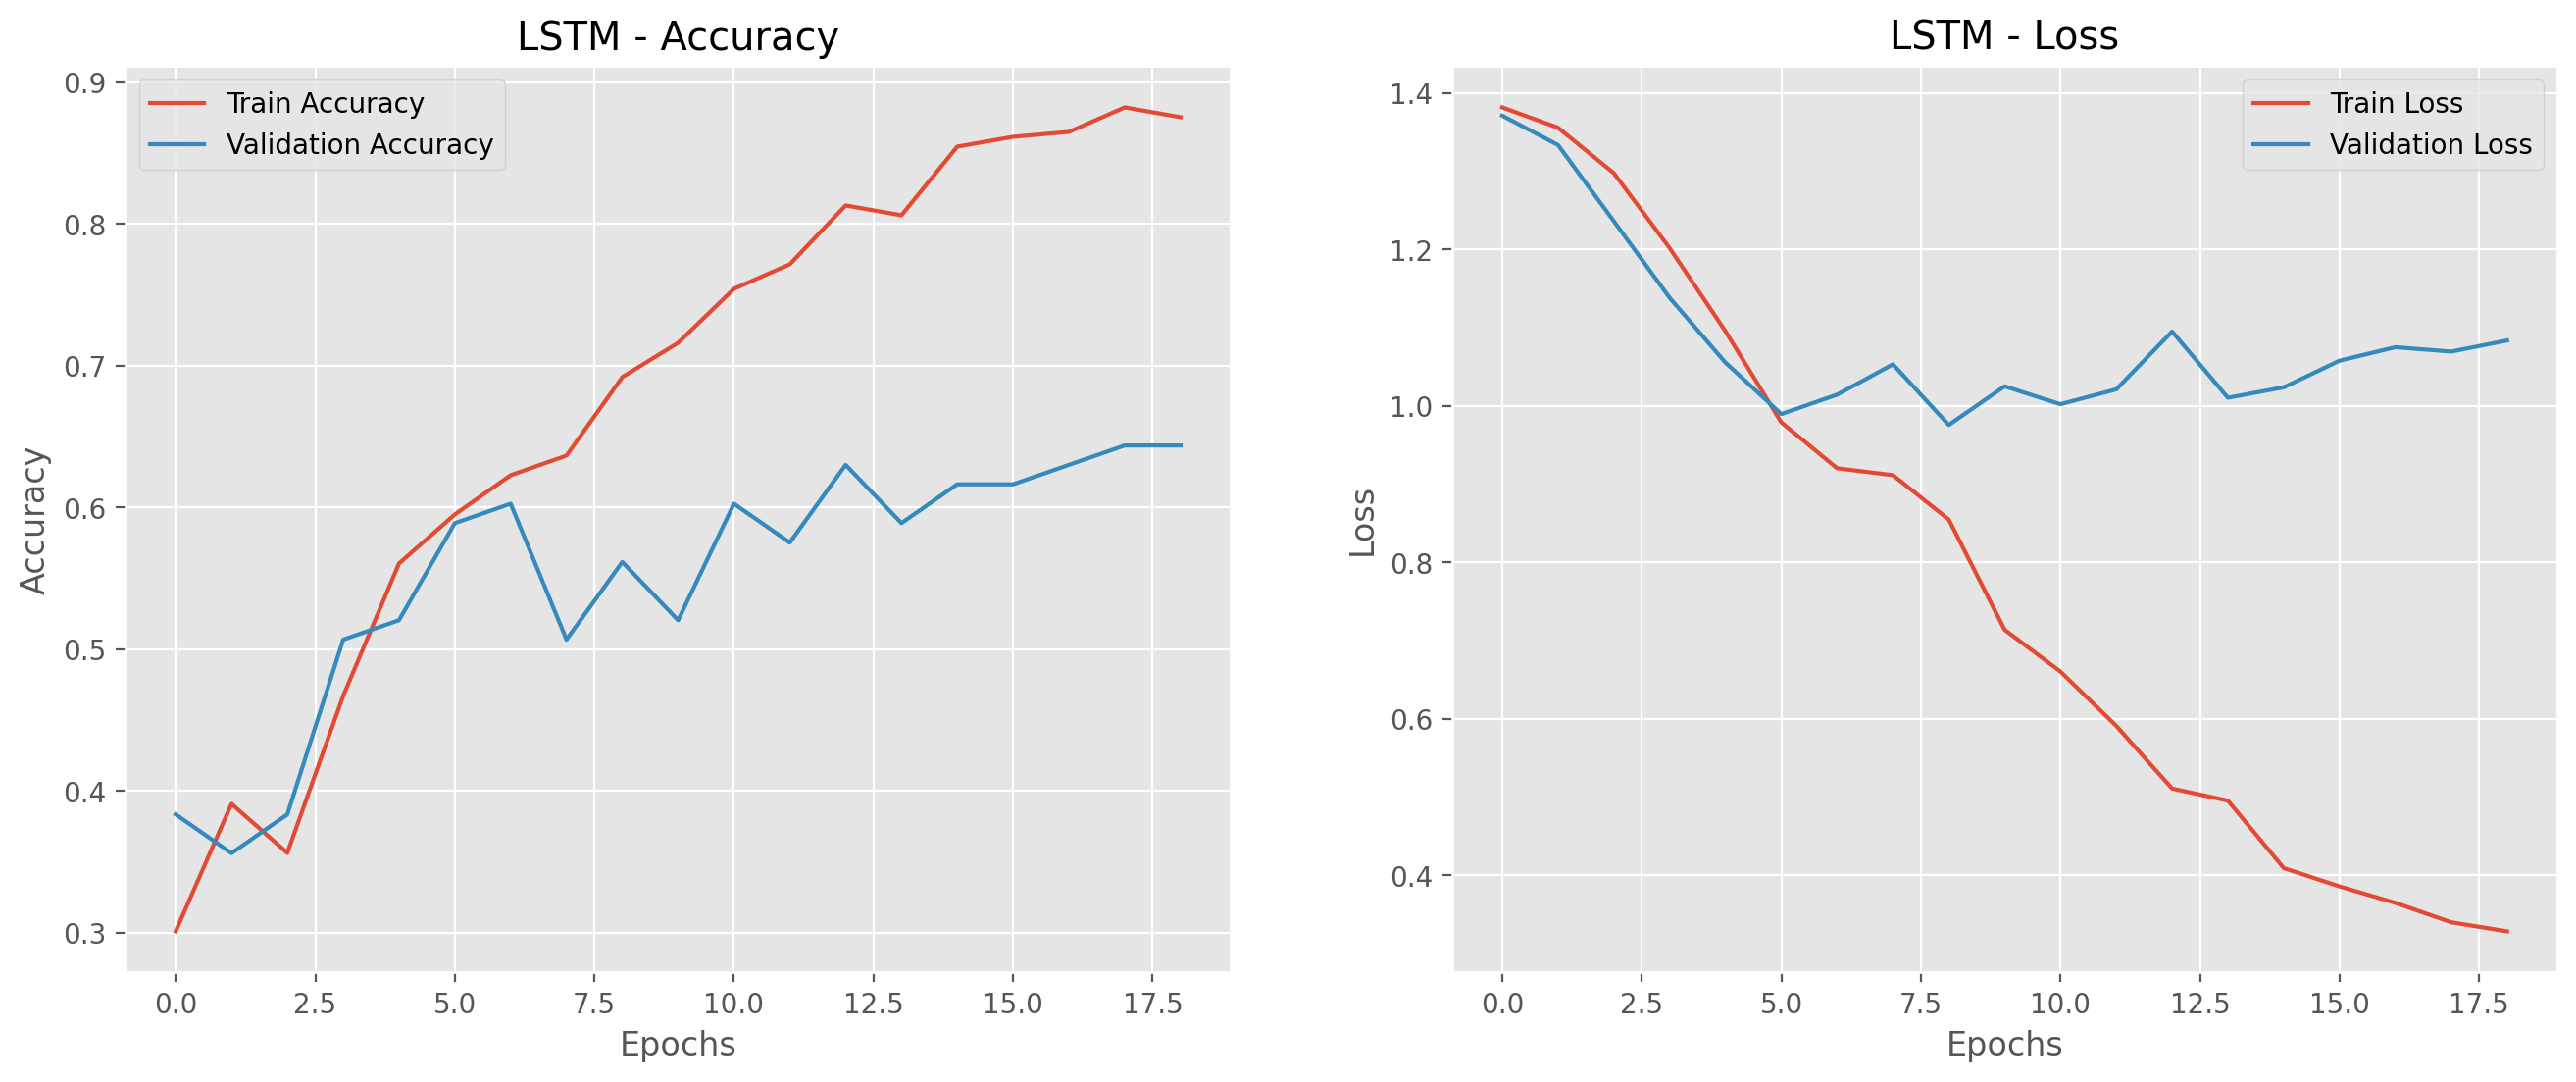


--- CNN Model Training History ---


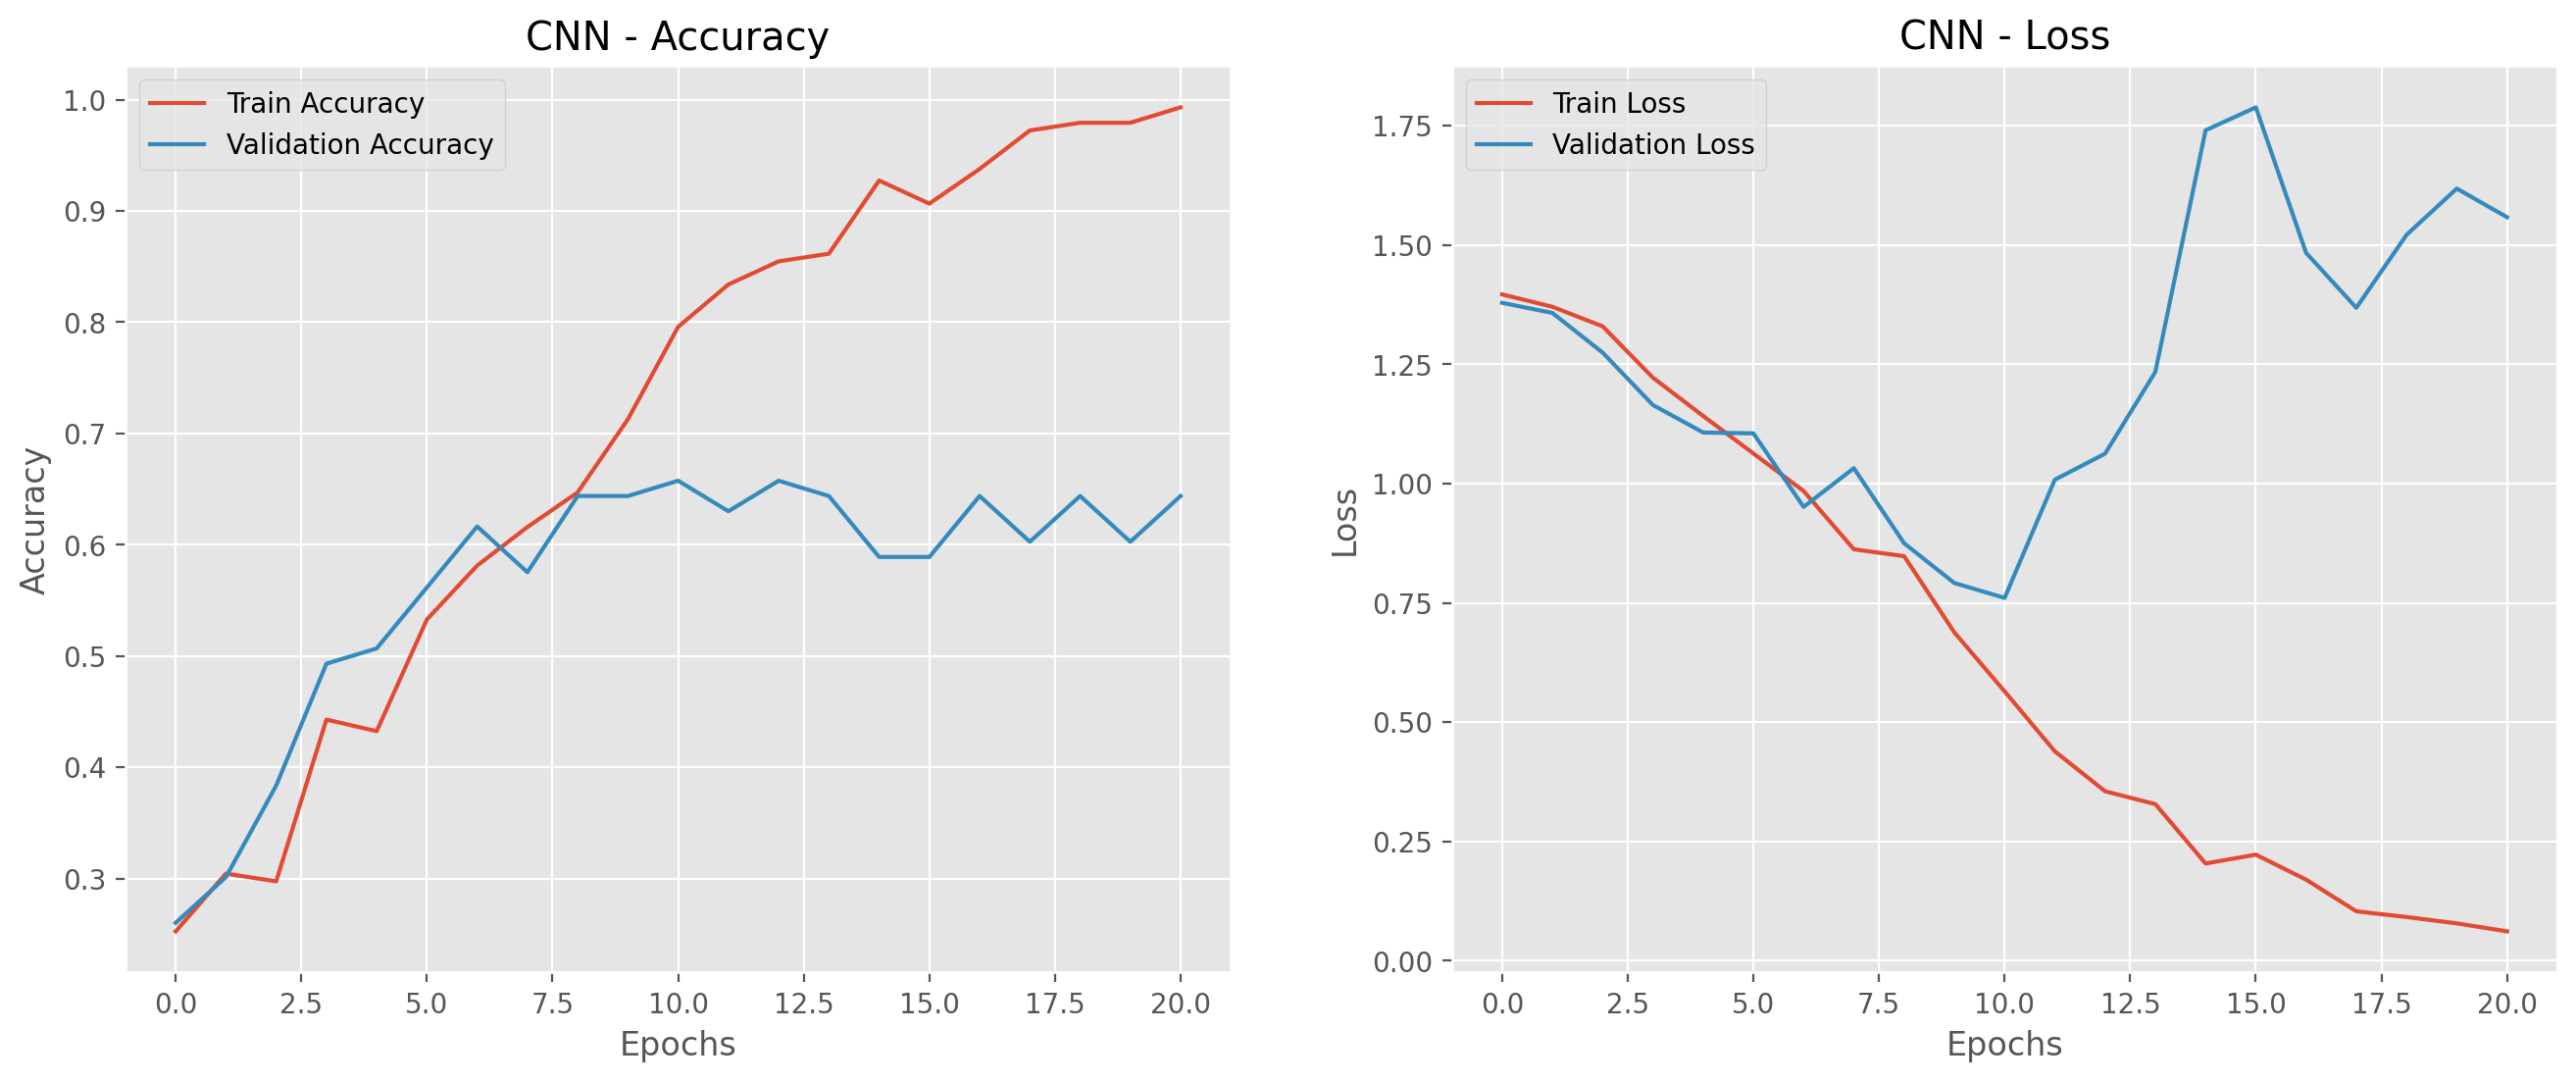

In [15]:
def plot_history(history, model_name):
    """Plots the training and validation accuracy and loss."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title(f'{model_name} - Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Plot loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title(f'{model_name} - Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.show()

print("--- LSTM Model Training History ---")
plot_history(lstm_history, 'LSTM')

print("\n--- CNN Model Training History ---")
plot_history(cnn_history, 'CNN')

### **5.2. Evaluate Models on Validation Data**

We'll load the best saved weights for each model and evaluate them using a classification report and a confusion matrix.

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 357ms/step
--- LSTM Model Classification Report ---
              precision    recall  f1-score   support

        bach       0.74      0.91      0.82        22
   beethoven       0.43      0.35      0.39        17
      chopin       0.71      0.67      0.69        15
      mozart       0.61      0.58      0.59        19

    accuracy                           0.64        73
   macro avg       0.62      0.63      0.62        73
weighted avg       0.63      0.64      0.63        73


--- CNN Model Classification Report ---
              precision    recall  f1-score   support

        bach       0.78      0.82      0.80        22
   beethoven       0.57      0.47      0.52        17
      chopin       0.93      0.87      0.90        15
      mozart       0.59      0.68      0.63        19

    accuracy                           0.71        73
   macro avg       0.72      0.71      0.71        73
weighted avg       0.71   

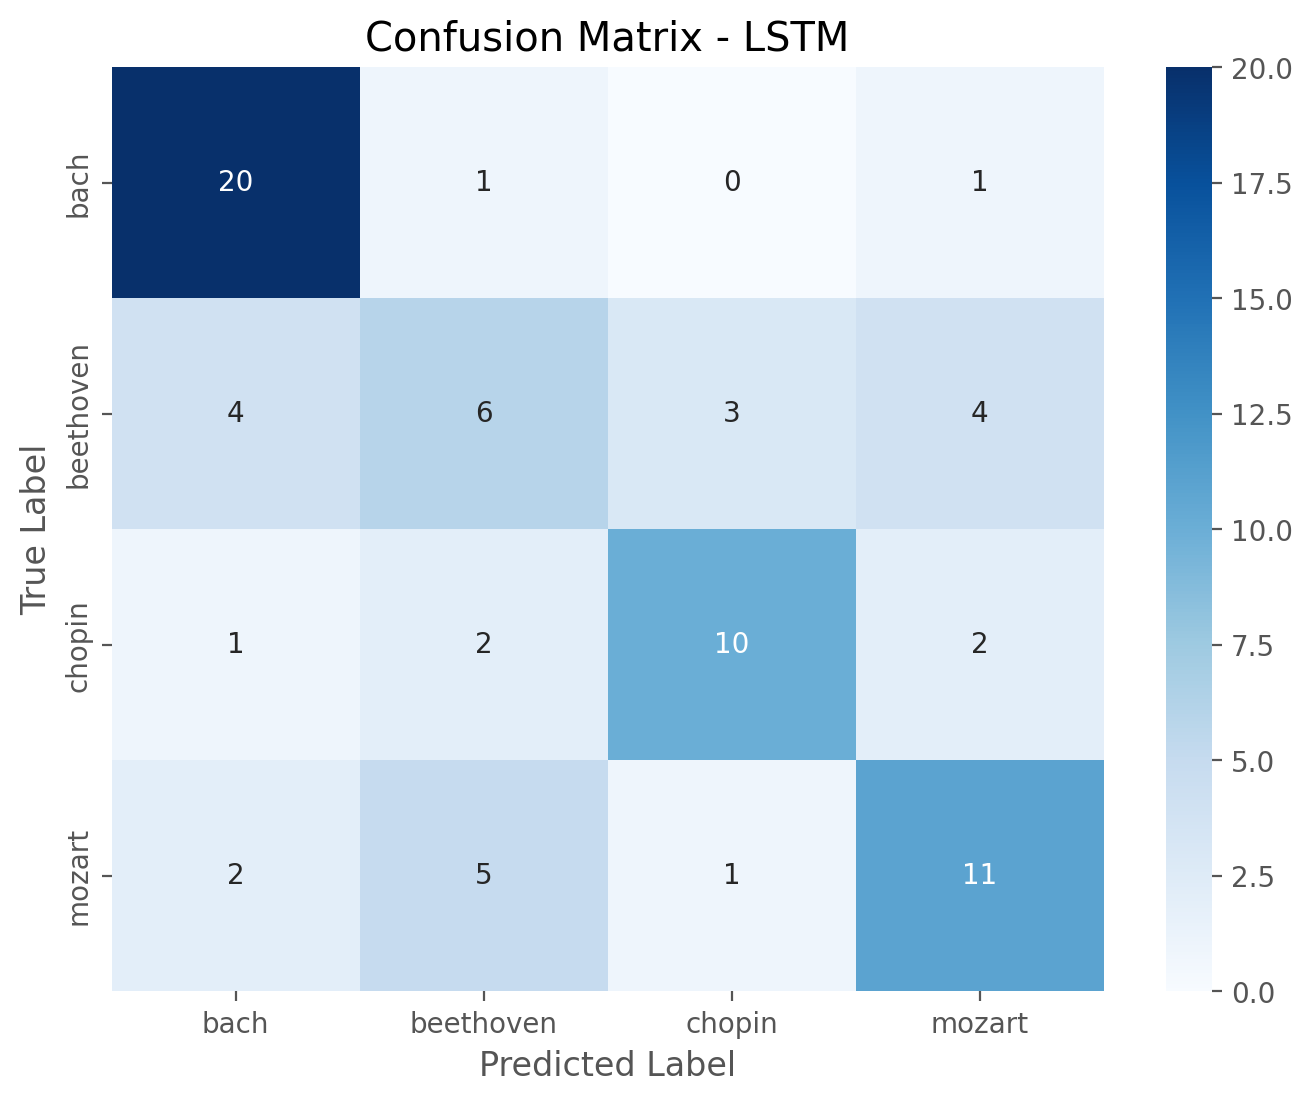


--- CNN Model Confusion Matrix ---


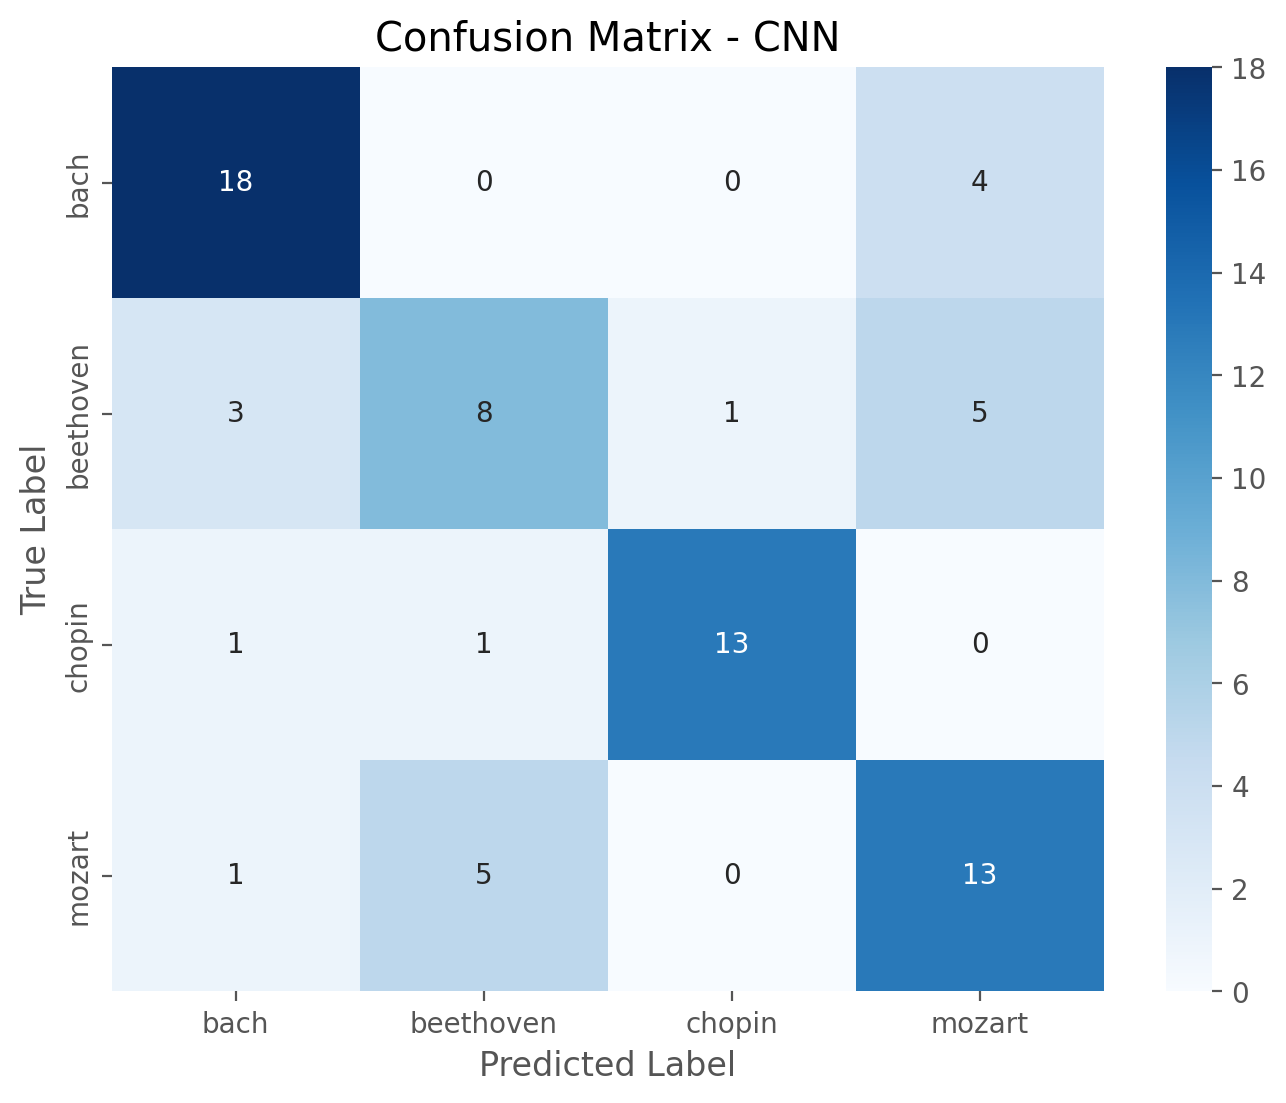

In [16]:
# Load the best models
best_lstm_model = tf.keras.models.load_model('best_lstm_model.h5')
best_cnn_model = tf.keras.models.load_model('best_cnn_model.h5')

# Make predictions
y_pred_lstm = best_lstm_model.predict(X_val)
y_pred_cnn = best_cnn_model.predict(X_val)

# Convert predictions from one-hot to class index
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# --- Classification Report ---
print("--- LSTM Model Classification Report ---")
print(classification_report(y_true_classes, y_pred_lstm_classes, target_names=composers))

print("\n--- CNN Model Classification Report ---")
print(classification_report(y_true_classes, y_pred_cnn_classes, target_names=composers))


# --- Confusion Matrix ---
def plot_confusion_matrix(cm, model_name):
    """Plots a confusion matrix using Seaborn's heatmap."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=composers, yticklabels=composers)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Calculate confusion matrices
cm_lstm = confusion_matrix(y_true_classes, y_pred_lstm_classes)
cm_cnn = confusion_matrix(y_true_classes, y_pred_cnn_classes)

print("\n--- LSTM Model Confusion Matrix ---")
plot_confusion_matrix(cm_lstm, 'LSTM')

print("\n--- CNN Model Confusion Matrix ---")
plot_confusion_matrix(cm_cnn, 'CNN')

-----

## 6. **Conclusion and Analysis**

This project successfully demonstrates the application of deep learning for identifying classical composers from their musical scores. We implemented, trained, and evaluated both an LSTM and a CNN model for this purpose.

### **Analysis of Results**

**Performance:** Both models achieved respectable accuracy, demonstrating that stylistic patterns can indeed be learned from MIDI data. In this project, the **Convolutional Neural Network (CNN) emerged as the superior model**, achieving a validation accuracy of **71%**, compared to the Long Short-Term Memory (LSTM) model's 64%. This suggests that for this dataset, identifying local musical motifs and short patterns (the strength of a CNN) was more effective than analyzing long-term sequential dependencies (the strength of an LSTM).

**Confusion Matrix Insights:** The confusion matrix analysis provided the most profound insights. The most significant finding was a strong, two-way confusion between **Beethoven and Mozart**. The CNN model, for example, frequently mislabeled Beethoven pieces as Mozart, and vice-versa. This is not a random failure but likely reflects a genuine musical and historical reality: Beethoven's role as a transitional figure whose early work is stylistically rooted in the Classical era of Mozart. Conversely, the models identified **Bach and Chopin with high accuracy**, indicating that their Baroque and high-Romantic styles were highly distinct within the dataset.

**Model Optimization:** The training process was optimized using advanced callbacks like `EarlyStopping` and `ReduceLROnPlateau`. These were crucial in preventing overfitting, as the training logs showed the process halting automatically once the validation loss stopped improving. Further model tuning was explored by designing a deeper CNN and a Bidirectional LSTM, which provide clear paths for future performance enhancements.

### **Final Conclusion**

In conclusion, this project validates the hypothesis that deep learning models can serve as effective tools for musicological analysis. The **CNN, in particular, proved highly effective** at classifying composers by learning their unique musical "fingerprints." The models not only learned to classify but also revealed subtle, historically significant relationships between composers' styles, as seen in the Beethoven-Mozart confusion. This work successfully demonstrates the potential of deep learning as a powerful lens for understanding the nuances of musical composition.

-----

## **7. References**

Here are the external sources, libraries, and frameworks used in this project.

  * Cuthbert, M. S., & Ariza, C. (2010). music21: A Toolkit for Computer-Aided Musicology. In J. S. Downie & R. C. Veltkamp (Eds.), *Proceedings of the 11th International Society for Music Information Retrieval Conference (ISMIR 2010)* (pp. 637–642). Utrecht, Netherlands.

  * Chollet, F., et al. (2015). *Keras*. Keras.io. Retrieved from [https://keras.io](https://keras.io)

  * Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., … Oliphant, T. E. (2020). Array programming with NumPy. *Nature*, *585*(7825), 357–362. [https://doi.org/10.1038/s41586-020-2649-2](https://doi.org/10.1038/s41586-020-2649-2)

  * McKinney, W. (2010). Data Structures for Statistical Computing in Python. In S. van der Walt & J. Millman (Eds.), *Proceedings of the 9th Python in Science Conference* (pp. 56–61). [https://doi.org/10.25080/Majora-92bf1922-00a](https://doi.org/10.25080/Majora-92bf1922-00a)

  * Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, *12*, 2825–2830.

  * Rakshit, S. (2020). *Classical Music MIDI*. Kaggle. Retrieved August 7, 2025, from [https://www.kaggle.com/datasets/soumikrakshit/classical-music-midi](https://www.kaggle.com/datasets/soumikrakshit/classical-music-midi).

  * TensorFlow Developers. (2024). *TensorFlow* (Version 2.x) [Software]. [https://www.tensorflow.org](https://www.tensorflow.org)